In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
df1=pd.read_csv('diabetes.csv')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [101]:
df1.shape

(768, 9)

In [85]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
x = df1.drop(["Outcome"], axis = 1).values
y = df1["Outcome"].values
x
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [107]:
import sys
print("size of input train data is:",sys.getsizeof(X_train))
print("size of input test data is:",sys.getsizeof(X_test))
print("size of output train data is:",sys.getsizeof(y_train))
print("size of output test data is:",sys.getsizeof(y_test))

size of input train data is: 39424
size of input test data is: 9984
size of output train data is: 5024
size of output test data is: 1344


0.7662337662337663


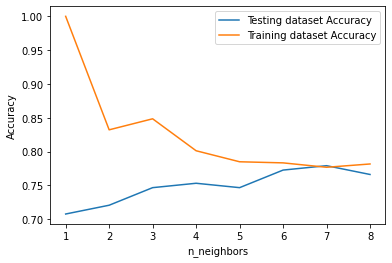

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 
knn = KNeighborsClassifier(n_neighbors=k)  
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)
print(knn.score(X_test,y_test))
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
knn_r_acc = []
for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(no_neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 
knn2 = KNeighborsClassifier(n_neighbors=2)  
knn2.fit(X_train,y_train)
pred=knn2.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.7597402597402597


In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42,stratify=y)
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 
knn3 = KNeighborsClassifier(n_neighbors=3)  
knn3.fit(X_train,y_train)
pred = knn3.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.6818181818181818


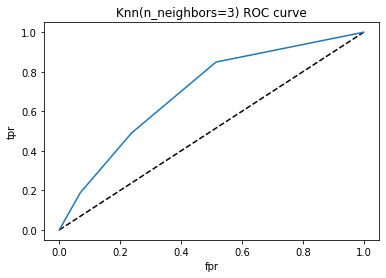

In [96]:
y_pred_proba = knn2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()


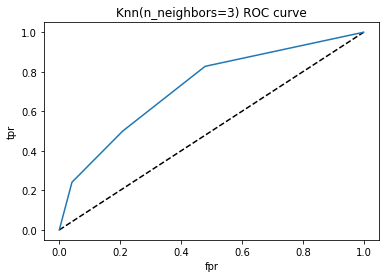

In [111]:
y_pred_proba = knn3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()
